# COMPSCI 367 Artificial Intelligence
## Tutorial - Week 2
Lecturer: Anna Trofimova

## Activity 4

In this activity, we will be implementing an automated stock trading system.

First, let's implement the class Market, which will represent the stock trading environment. At the beginning of trading, the market has 200 shares, each worth 100 coins. The class method get_current_price simulates the stochastic nature of stock price changes. It returns the current price by applying random fluctuations to the previous price value. Run the code below.

In [150]:
import random


class Market(object):
    def __init__(self):
        self.current_price = 100  # Initialize the current stock price to 100
        self.volatility = 0.1  # Set the volatility range to 0.1 (10%)
        self.price_history = []  # Create an empty list to store the price history
        self.instock = 200

    def get_current_price(self):
        """
        Get the current stock price with random fluctuations based on volatility.

        Returns:
        float: The updated current stock price after applying the random percentage change.
        """

        # Generate a random percentage change within the specified volatility range
        percentage_change = random.uniform(-self.volatility, self.volatility)

        # Calculate the new stock price based on the percentage change and the number of available shares
        self.current_price = self.current_price * (1 + percentage_change) * self.instock/200

        # Add the new price to the price history
        self.price_history.append(self.current_price)

        # Return the updated current stock price
        return self.current_price

Now, let's implement a automated trading agent, which chooses weather to buy or sell shares based on the current stock price. Let's assume that the agent starts with 300 coins in the bank and 0 shares. It's method choose_action stands for choosing whether to sell shares, buy shares, or hold. The decision is based on if-else rule:
 - if the current price is over 100, then it sells all the shares;
 - if the price is below 60 then it buys all the shares it can buy with the money in the bank;
 - in all other cases it does nothing.

Complete the method choose_action based on the specifications above.
Tip: don't forget to update bank and shares attributes.

In [151]:
import math


class TradingAgent(object):
    def __init__(self):
        self.bank = 300   # Initialize the agent's bank balance to 300 coins
        self.shares = 0   # Initialize the agent's share holdings to 0

    def choose_action(self, current_price):
        """
        Choose an action (buy, sell, or do nothing) based on the current stock price.

        Args:
        current_price (float): The current stock price.

        Returns:
        tuple: A tuple containing the chosen action ('buy', 'sell', or 'do nothing') and the number of shares involved.
        """

        if current_price > 100:
            action = 'sell'   # If the price is higher than 100, choose to sell
            shares = self.shares   # Store the number of shares held by the agent
            self.bank += self.shares * current_price   # Increase the bank balance by selling all available shares
            self.shares = 0   # Reset the agent's share holdings to 0

        elif current_price < 60:
            action = 'buy'   # If the price is lower than 60, choose to buy
            shares = math.floor(self.bank / current_price)   # Calculate the maximum number of shares that can be bought
            self.shares += shares   # Increase the agent's share holdings with the purchased shares
            self.bank -= shares * current_price   # Decrease the bank balance by the total cost of the purchased shares

        else:
            action = 'nothing'   # If the price is between 60 and 100, choose to do nothing
            shares = 0   # No changes to shares

        return action, shares   # Return the chosen action and the number of shares involved (if any)

**Question 1:** What type of agent is it?

Answer: It's a reflex (reactive) agent.

The class below brings together the TradingAgent and Market classes to simulate a trading session and has two methods for visualisation - one plots the price change over time (generated by a stochastic process); the other one plots the history of the agent's bank.

Tip: matplotlib is not an in-build library, you might need to install it. Add and run cell with "pip install matplotlib"

In [162]:
import matplotlib.pyplot as plt

class Trading(object):
    def __init__(self):
        self.agent = TradingAgent()
        self.market = Market()
        self.bank_history = []

    def trade(self, duration):
        for _ in range(duration):
            self.bank_history.append(self.agent.bank)
            current_price = self.market.get_current_price()
            action, shares = self.agent.choose_action(current_price)
        self.bank_history.append(self.agent.bank)
        return

    def plot_bank_history(self):
        # Generate x-axis values for plotting
        time = list(range(len(self.bank_history)))

        # Plot the bank
        plt.plot(time, self.bank_history, marker='o')
        plt.xlabel('Time')
        plt.ylabel('Money')
        plt.title('Money in the bank')
        plt.grid(True)

    def plot_price_history(self):
        # Generate x-axis values for plotting
        time = list(range(len(self.market.price_history)))

        # Plot the simulated stock prices
        plt.plot(time, self.market.price_history, marker='o')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.title('Simulated Stock Prices')
        plt.grid(True)

**Question 2:** Take a look at the agent model (lecture on Agents & Environments, slide 4) and tell which methods represent percepts and actions.

Answer: Among the methods in the code, get_current_price would be the closest to "percepts" as it provides information about the current state of the environment (stock market). The choose_action method serves as an implementation of the mapping function between sensors (current stock price) and actuators (buying, selling, or holding actions) for the agent.

Currently, there is no method that directly implements "actions" of the agent as its decisions do not affect the market state. To fix this, we could add an additional method to the Market class that updates the instock attribute based on the number of shares bought or sold. We would also need to rewrite the get_current_price method to take the updated instock attribute into account when generating a new stock price. This way, the simulation would better reflect the agent model.

Let's run simulation for 100 steps and check how much money the agent earned.
Tip: since the stock price is generated stochastically you can run the cell below several times to get the sense of agent's performance.

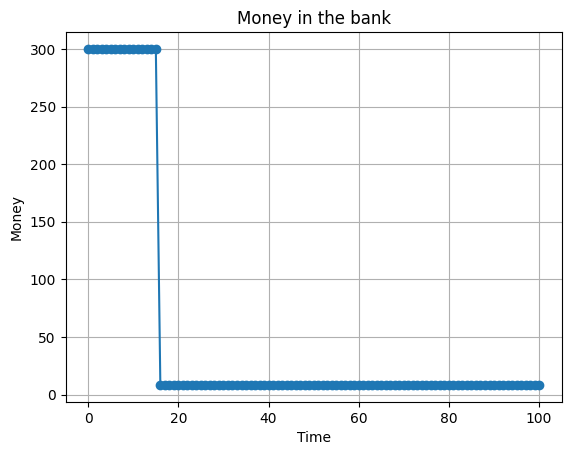

In [163]:
trading = Trading()
trading.trade(100)
trading.plot_bank_history()

The chances are that the agent has not earned anything or spent all the money.

**Question 3:** Run the plot below and try to explain what happened. Why didn't the agent make any profit?

Answer: (a) The stock price didn't go below the threshold (60) so the agent didn't buy any shares. (b) the agent bought shares, but their price didn't go above the threshold (100). The main problem here is that the agents decisions are reprogrammed, so it cannot make an informed decision.

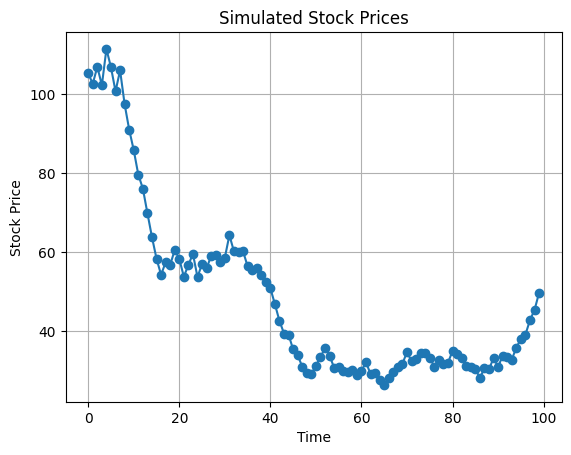

In [164]:
trading.plot_price_history()

**Question 4:** What can you do to improve the agent's performance?

Answer: You could implement an agent with memory. The code below implements a Model-Based Agent that makes a decision based on the current price and historical data. It doesn't always receives profit (try to run it several times) but it performs much better than the Reflex Agent.

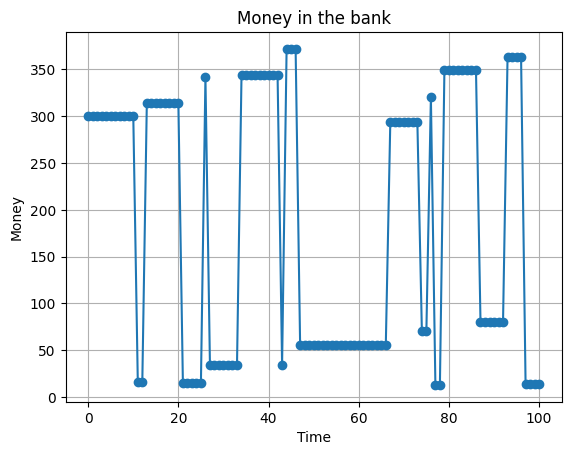

In [167]:
class TradingAgentWithMemory(TradingAgent):
    def __init__(self):
        super().__init__()
        self.price_history = []  # Create an empty list to store the previous stock prices

    def choose_action(self, current_price):
        """
        Choose an action (buy, sell, or do nothing) based on the current stock price and the previous prices.

        Args:
        current_price (float): The current stock price.

        Returns:
        tuple: A tuple containing the chosen action ('buy', 'sell', or 'hold') and the number of shares involved.
        """

        if len(self.price_history) < 10:
            self.price_history.append(current_price)
            action = 'nothing'  # If the price history is not yet sufficient, choose to hold
            shares = None
            return action, shares

        # Calculate the average of the last 10 stock prices to compare with the current price
        avg_last_10_prices = sum(self.price_history[-10:]) / 10

        if current_price > avg_last_10_prices:
            action = 'sell'  # If the current price is higher than the average, choose to sell
            shares = self.shares  # Store the number of shares held by the agent
            self.bank += self.shares * current_price  # Increase the bank balance by selling all available shares
            self.shares = 0  # Reset the agent's share holdings to 0

        elif current_price < avg_last_10_prices:
            action = 'buy'  # If the current price is lower than the average, choose to buy
            shares = math.floor(self.bank / current_price)  # Calculate the maximum number of shares that can be bought
            self.shares += shares  # Increase the agent's share holdings with the purchased shares
            self.bank -= shares * current_price  # Decrease the bank balance by the total cost of the purchased shares

        else:
            action = 'nothing'  # If the current price is the same as the average, choose to do nothing
            shares = 0  # No shares are involved when doing nothing

        self.price_history.append(current_price)  # Add the current price to the price history
        return action, shares  # Return the chosen action and the number of shares involved (if any)


class TradingWithMemory(Trading):
    def __init__(self):
        super().__init__()
        self.agent = TradingAgentWithMemory()


trading = TradingWithMemory()
trading.trade(100)
trading.plot_bank_history()
# trading.plot_price_history()